# Contract plots

This notebook explores how the terms of renegotiation-proof contracts change with parameters.

In [1]:
import Contract

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact,fixed
plt.rcParams['figure.figsize'] = 10, 8
np.set_printoptions(precision=2) 

In [3]:
def plot_ckap(beta=0.6, rho=0.8, y0 = 100, comp = True):
    
    if comp:
        C = Contract.Competitive(beta=beta)
    else:
        C = Contract.Monopoly(beta=beta)
    
    num = 50
    C.rho = rho  
    
    kk = np.linspace(0, 10, num)
  
    C.y  = np.array([y0, (300-y0)/2, (300-y0)/2])
    c = np.zeros(shape=(num,3))    # last column for profits or utility
    fig, ax = plt.subplots(2,1)
    for i, k in enumerate(kk):
        C.kappa = k
        c[i] = C.reneg_proof()    
        
    ax[0].axvline(C.kbar(), linestyle=':')    
    ax[1].axvline(C.kbar(), linestyle=':') 
    ax[0].plot(kk, c[:,0])
    ax[1].plot(kk, c[:,1:3])
    

    #ax[0].set_ylim(110,160)
    ax[1].set_ylim(40,110)
    ax[0].set_title(r'$c_0^0$')
    ax[1].set_title(r'$c_1^0, c_2^0$')
    ax[1].set_xlabel(r'$\kappa$', fontsize=12)
    
    ax[0].grid(), ax[1].grid()

Note that the first of the subplots for $c_0^0$ is set to autoscale, while the others are on a fixed scale.

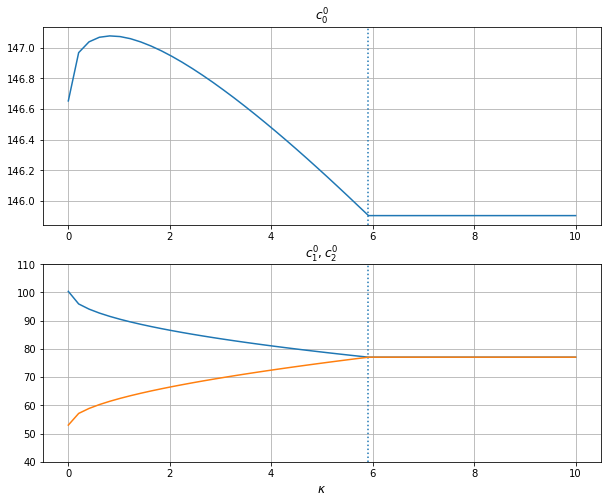

In [4]:
plot_ckap(beta=0.6, rho=0.8, y0 = 100, comp = True)

## Interactive Plot

In order for the widget sliders to affect the chart you must be running this on a jupyter notebooks server.  If you are viewing this on the web, click on the Rocket icon button above to launch a cloud server service (Binder, or google colab).

In [5]:
interact(plot_ckap, beta=(0.4, 0.95, 0.05), rho = (0.4,2, 0.11), y0=(20,200,10));

interactive(children=(FloatSlider(value=0.6, description='beta', max=0.95, min=0.4, step=0.05), FloatSlider(va…

# Compare $c_0^F$ to $c_0^P$

Proposition 2 of the paper describes how period 0 consumption changes depending on how tightly the no-renegotiation constraint binds. As argued, for the competitive contract case, (when $\kappa = 0$) there will be a $rho>1$ above which period 0 consumption rises (i.e. it becomes optimal to borrow less, save more compared to the first best).

In [6]:
def zero_cons_plot(b):
    num = 50
    
    for i, rh in enumerate(np.linspace(0.2,2,50)):
        plt.scatter(rh, 300/(1+b+b**(1/rh)), color='k' )
        plt.scatter(rh, 300/(1+2*b**(1/rh)) )
    plt.xlabel(r'$\rho$')

Comparing $c_0$ renegotiation proof (kappa=0, so as if renegotiated; black line) to efficient (color line).  

But note that effects are small

In [7]:
interact(zero_cons_plot, b=(0.1,0.95, 0.05));

interactive(children=(FloatSlider(value=0.5, description='b', max=0.95, min=0.1, step=0.05), Output()), _dom_c…